In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Get to know the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crimes.csv')

df.shape

(568293, 10)

In [ ]:
df.head(2).T

,0,1
dt,2018-01-01,2018-04-01
region,אילת,אילת
police_district,מחוז דרומי,מחוז דרומי
police_merhav,מרחב אילת דרום,מרחב אילת דרום
police_station,מרחב אילת דרום,מרחב אילת דרום
crime_group,NaN,NaN
crime_type,NaN,NaN
tikim_sum,199,301
social_rank,6,6
population,52285,52285


In [ ]:
df['region'].nunique()

163

In [ ]:
(df['dt'].min(), df['dt'].max())

('2018-01-01', '2023-01-01')

# Visualize the relationship between `social_rank` and `tikim_sum`

In [ ]:
%%capture
!pip install joypy

In [ ]:
from joypy import joyplot

In [ ]:
to_plot = (
    df.groupby(['region', 'social_rank'], as_index=False)
    ['tikim_sum'].sum()
)

to_plot

,region,social_rank,tikim_sum
0,אבו סנאן,3,1808
1,אבן יהודה,9,1854
2,אום אל פחם,2,7574
3,אופקים,3,7495
4,אור יהודה,5,8678
...,...,...,...
158,שוהם,9,1668
159,שפרעם,3,8130
160,תל אביב יפו,8,196127
161,תל מונד,9,1866


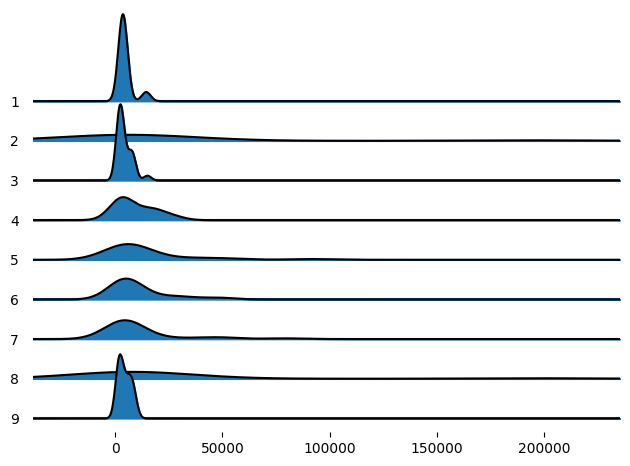

In [ ]:
joyplot(
    to_plot,
    by='social_rank',
    column='tikim_sum'
);

# Normalize `tikim_sum` by the `population` size

In [ ]:
to_plot = (
    df.groupby(['region', 'social_rank'], as_index=False)
    .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())
    .rename(columns={None: 'tikim_norm'})
)

to_plot

<ipython-input-10-1ff5922486a0>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())


,region,social_rank,tikim_norm
0,אבו סנאן,3,0.128245
1,אבן יהודה,9,0.135062
2,אום אל פחם,2,0.134990
3,אופקים,3,0.244439
4,אור יהודה,5,0.236464
...,...,...,...
158,שוהם,9,0.079259
159,שפרעם,3,0.193548
160,תל אביב יפו,8,0.426606
161,תל מונד,9,0.141966


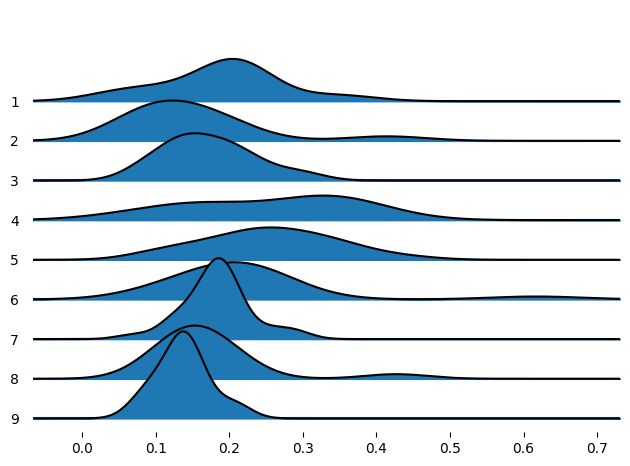

In [ ]:
joyplot(
    to_plot,
    by='social_rank',
    column='tikim_norm'
);

# Handle regions with problematic reporting

In [ ]:
df.isna().mean()

,0
dt,0.00000
region,0.00000
police_district,0.00000
police_merhav,0.00000
police_station,0.00000
crime_group,0.00691
crime_type,0.00691
tikim_sum,0.00000
social_rank,0.00000
population,0.00000


In [ ]:
# make sure crime_type is nan if and only if crime_group is nan
(df['crime_type'].isna() == df['crime_group'].isna()).all()

True

<ipython-input-14-abf0bdf20929>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  to_plot = df.groupby('region').apply(


<Axes: ylabel='Frequency'>

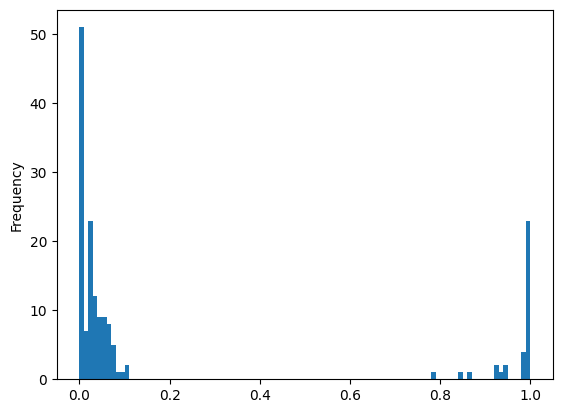

In [ ]:
to_plot = df.groupby('region').apply(
    lambda gp: (
        gp[gp['crime_type'].isna()]['tikim_sum'].sum() /
        gp['tikim_sum'].sum()
    )
)

to_plot.plot.hist(bins=100)

In [ ]:
# filter the problematic regions
df = df.groupby('region').filter(
    lambda gp: (
        gp[gp['crime_type'].isna()]['tikim_sum'].sum() /
        gp['tikim_sum'].sum() < 0.5
    )
)

In [ ]:
to_plot = (
    df.groupby(['region', 'social_rank'], as_index=False)
    .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())
    .rename(columns={None: 'tikim_norm'})
)

to_plot

<ipython-input-16-1ff5922486a0>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())


,region,social_rank,tikim_norm
0,אבן יהודה,9,0.135062
1,אופקים,3,0.244439
2,אור יהודה,5,0.236464
3,אור עקיבא,5,0.264549
4,אזור,7,0.182343
...,...,...,...
123,שגב שלום,1,0.348939
124,שדרות,5,0.361670
125,שוהם,9,0.079259
126,תל אביב יפו,8,0.426606


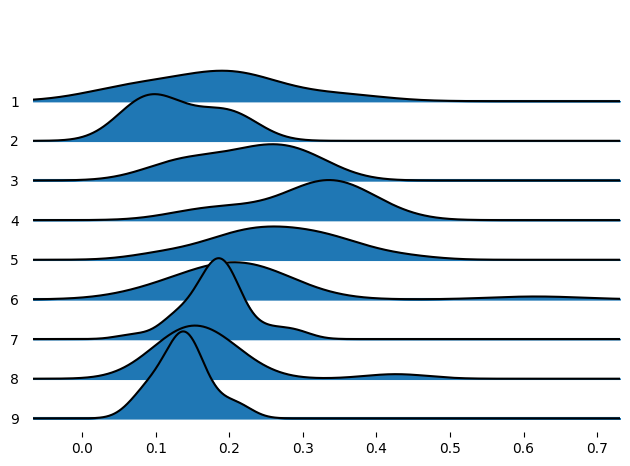

In [ ]:
joyplot(
    to_plot,
    by='social_rank',
    column='tikim_norm'
);

In [ ]:
to_plot[to_plot['social_rank'] <= 3].sort_values('tikim_norm')

,region,social_rank,tikim_norm
53,מודיעין עילית,1,0.046653
118,רכסים,2,0.078042
15,ביתר עילית,1,0.083757
6,אלעד,2,0.084147
16,בני ברק,2,0.098156
51,מג'דל שמס,3,0.121299
43,כסיפה,1,0.136968
14,בית שמש,2,0.137902
42,כאבול,3,0.158709
33,חורה,1,0.181358


# Look for correlations between `tikim_norm` and specificic values of `crime_type`

In [ ]:
df_to_train = (
    df.groupby(['region', 'crime_type', 'social_rank'], as_index=False)
    .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())
    .rename(columns={None: 'tikim_norm'})
)

df_to_train

<ipython-input-19-f153ea9dda4a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda gp: gp['tikim_sum'].sum() / gp['population'].max())


,region,crime_type,social_rank,tikim_norm
0,אבן יהודה,(תקיפה (למעט עובדי ציבור,9,0.012239
1,אבן יהודה,איומים,9,0.018358
2,אבן יהודה,"גידול,ייצור והפקת-סמים",9,0.000364
3,אבן יהודה,גניבה מתוך רכב,9,0.004517
4,אבן יהודה,"גניבה ע""י עובדים וסוכנים",9,0.000073
...,...,...,...,...
9743,תל מונד,שוחד,9,0.000076
9744,תל מונד,שמוש בסמים מסוכנים,9,0.005250
9745,תל מונד,תקיפה לשם גניבה,9,0.000076
9746,תל מונד,תקיפת והכשלת שוטר,9,0.001826


In [ ]:
from scipy.stats import spearmanr

ans = []

for crime_type in df_to_train['crime_type'].unique():
  df_crime = df_to_train[df_to_train['crime_type'] == crime_type]
  if len(df_crime) < 10: continue  # we want a meaningful amount of samples to calculate the correlation
  spearman, pval = spearmanr(df_crime['social_rank'], df_crime['tikim_norm'])
  ans.append({'crime_type': crime_type,
              'spearman': spearman,
              'pval': pval})

# Inspect the statistically significant correlations, after handling the multiple comparisons problem

In [ ]:
alpha = 0.05

ans = pd.DataFrame(ans).sort_values('pval')
ans = ans[ans['pval'] < alpha / len(ans)]
ans

,crime_type,spearman,pval
16,התפרצות לבית דירה,0.612905,1.478722e-14
26,סטיסטי כל השאר,-0.599270,7.836588e-14
73,תקיפת שוטר בנסיבות חמורות,-0.633580,1.427418e-13
19,חבלה גופנית חמורה,-0.585154,4.061729e-13
15,הצתה,-0.523749,2.640501e-10
48,תקיפת והכשלת שוטר,-0.519593,3.286100e-10
35,עבירות נגד הסדר הצבורי,-0.518107,3.763584e-10
41,קטטות והפרעות ברחובות,-0.485683,7.130262e-09
5,גניבה שמוש רכב ללא רשות,0.452073,8.474866e-08
24,סחיטה,-0.445226,1.395729e-07


<Axes: xlabel='social_rank', ylabel='tikim_norm'>

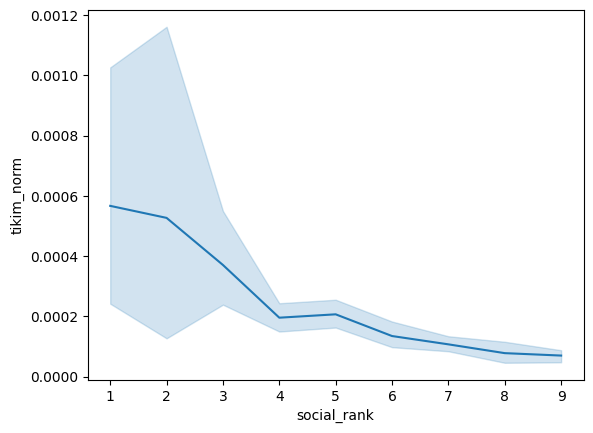

In [ ]:
import seaborn as sns

df_crime = df_to_train[df_to_train['crime_type'] == 'תקיפת שוטר בנסיבות חמורות']
sns.lineplot(x=df_crime['social_rank'], y=df_crime['tikim_norm'])